<a href="https://colab.research.google.com/github/Fabrice-64/Fabrice-64/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutoriel sur le Perceptron
Le Perceptron fait partie des premiers algorithmes de machine learning. Ils posé les fondations de nombreux algorithmes ultérieurs.

Le terme **Perceptron**: date de 1943, créé par Warren McCulloch et Walter Pitts.

Le premier **Perceptron** a été construit par Frank Rosenblatt: 400 cellules photoélectriques et potentiomètres.

Principe du **Perceptron**: simuler un seul neurone dans le cerveau humain. Il reçoit des inputs, et si les inputs sont suffisamment forts, il est stimulé et il envoie un signal au neurone suivant.

Les limites du **Perceptron** sont apparues ultérieurement en raison de son incapacité à apprendre des patterns non-linéaires => Développement des algorithmes **SVM** (Support Vector Machine)

Le **Perceptron** permet une classification linéaire de type binaire.


L'activation du **Perceptron** passe par l'activation de la fonction **Heaviside**

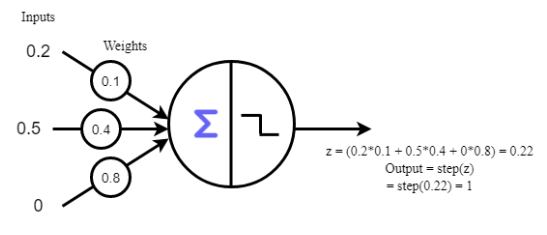

Les biais sont utilisés pour éviter que certains inputs soient réduits à la valeur 0

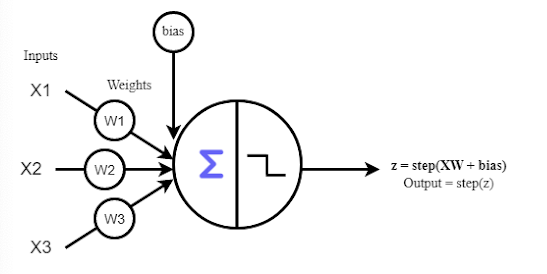

**Les fonctions d'activation** permettent au modèle d'apprendre de faire des choix basés sur les données d'input.

Elles permettent également d'introduire la non-linéarité dans le modèle, nécessaire pour des relations plus complexes dans la donnée.

Les fonctions les plus communes sont: **Sign function**, **Heaviside function**, **Sigmoid function**, **ReLu function**.

### Provoquer l'apprentissage du Perceptron

Application de la règle de **Hebb** : Quand un neurone biologique est activé par un autre neurone, la relation entre ces deux neurones devient plus forte.

Entraîner des neureones revient à détecter l'erreur faite par l'algorithme et à trouver les Weights qui réduisent cette erreur autant que possible.

L'algorithme fait une première prédiction qui est comparée au résultat attendu. L'erreur est calculée pour chacune des instances d'entraînement et les poids sont progressivement ajustés pour réduire la marge d'erreur.

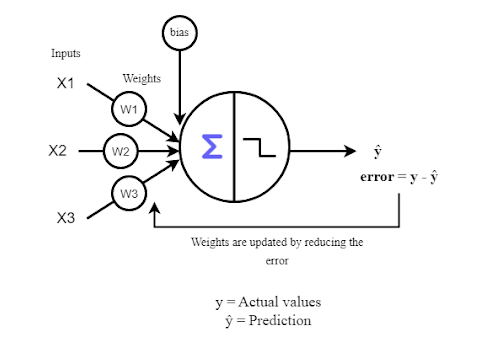

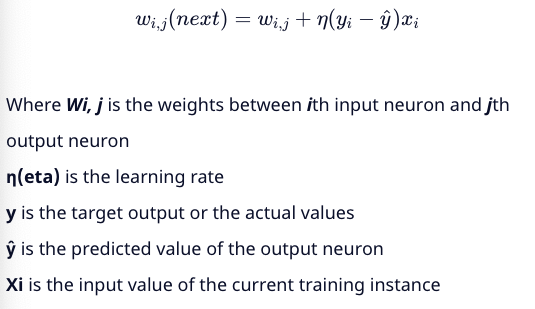

Le taux d'apprentissage est nécessaire pour déterminer la longueur de chaque step: l'expérience dira s'il faut un taux plutôt faible ou plutôt élevé.

## Décrire un Perceptron from Scratch

In [ ]:
import numpy as np

class Perceptron:
  """ Initialize the Perceptron"""
  def __init__(self, learning_rate, epochs):
    self.weights = None
    self.bias = None
    self.learning_rate = learning_rate
    self.epochs = epochs

  #heaviside activation function
  def activation(self, z):
    return np.heaviside(z, 0) # heaviside(z) heaviside -> activation

  def fit(self, X, y):
    n_features = X.shape[1]

    # Initialize Weights and bias
    self.weights = np.zeros((n_features,))
    self.bias = 0

    # Iterate through all the epochs
    for epoch in range(self.epochs):

      # Traverse through the entire training set
      for i in range(len(X)):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.activation(z)

        # Uppdate Weights and bias
        self.weights = self.weights + self.learning_rate * (y[i] - y_pred[i]) * X[i]
        self.bias = self.bias + self.learning_rate * (y[i] - y_pred[i])

    return self.weights, self.bias

  def predict(self, X):
    z = np.dot(X, self.weights) + self.bias
    return self.activation(z)

## Préparation du modèle

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
from sklearn.model_selection import train_test_split

X = iris.data[:, (0, 1)] # Sepal length, Sepal width
y = (iris.target == 0).astype(np.int_)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
# X_train, y_train

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


## Entrainement du modèle

In [ ]:
perceptron = Perceptron(0.001, 100)

perceptron.fit(X_train, y_train)

predictions = perceptron.predict(X_test)

## Récupération des résultats

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(predictions, y_test)

0.96